# Time series forcesting fundamentals with TensorFlow + Milestone Project 3 : BitPredict

Let's wrtie some TesnroFlow code to predict the price of Bitcoin based on the historical price of Bitcoin.

**Note:** This is nont financial advice.

links :
* All resources: https://github.com/mrdbourke/tensorflow-deep-learning.
* Bo ok version of actual code/text : https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/.

## Get data

We're going to be using the historical price data of Bitcoin to try and predict the future price of Bitcoin, we downloaded the data from here :

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-04-07 20:13:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-04-07 20:13:58 (7.12 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



### importing time series

In [2]:
# import with pandas
import pandas as pd
# Let's read in our Bitcoin data and parse the data
df = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                        parse_dates = ["Date"],
                        index_col=["Date"]) # parse the data column and tell pandas column 1 is a datetime
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
# How many samples do we have?
len(df)

2787

** Note:** The **seasonality** of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year.

In [6]:
# Only want closing price for each day 
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


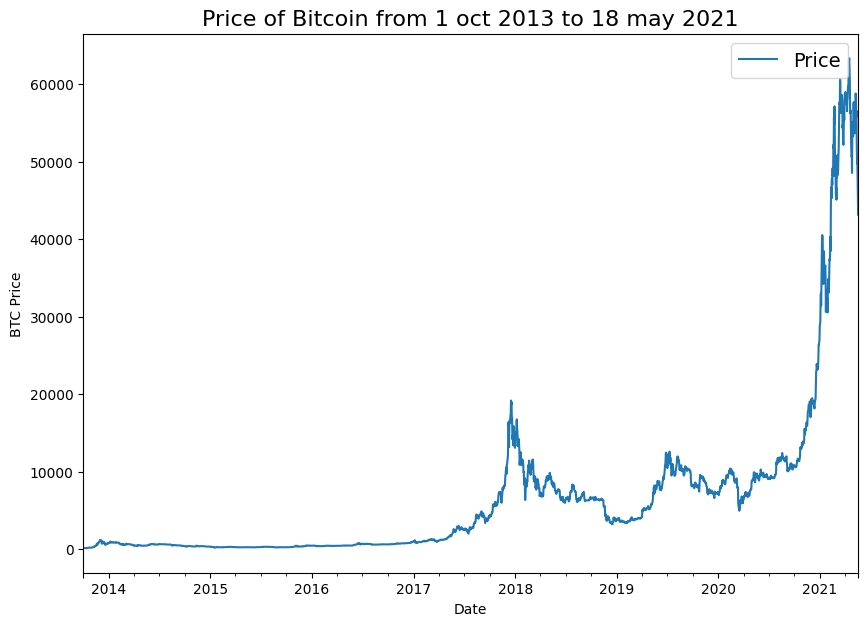

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 oct 2013 to 18 may 2021", fontsize=16)
plt.legend(fontsize=14)

### Importing time series data with Python's CSV module


In [8]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter= ",")
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as date (not string)
    btc_price.append(float(line[2])) # get the closing price as floa

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

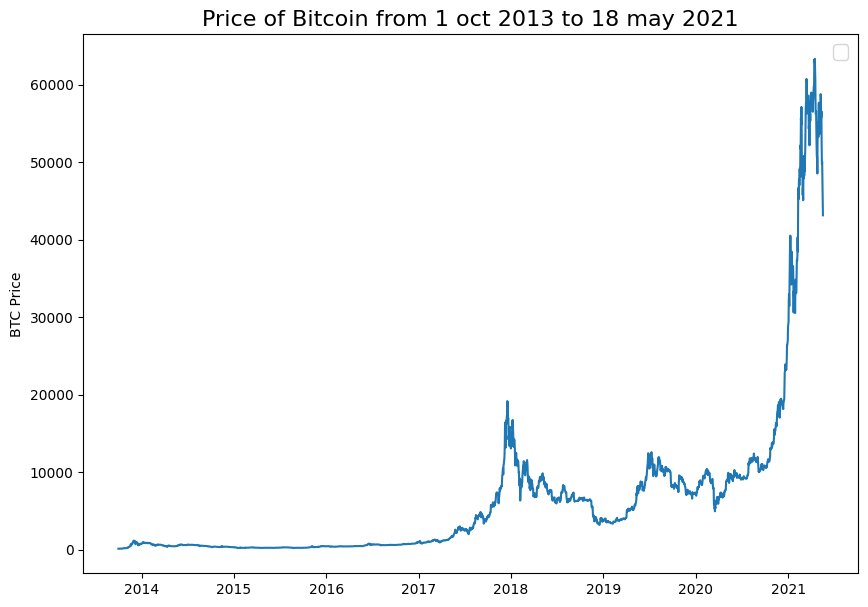

In [9]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 oct 2013 to 18 may 2021", fontsize=16)
plt.legend(fontsize=14)

## Format data part1: Create train and test sets of our time series data


### Creating train and test sets with time series data (the wrong way)

In [10]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [11]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [12]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # BTC prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

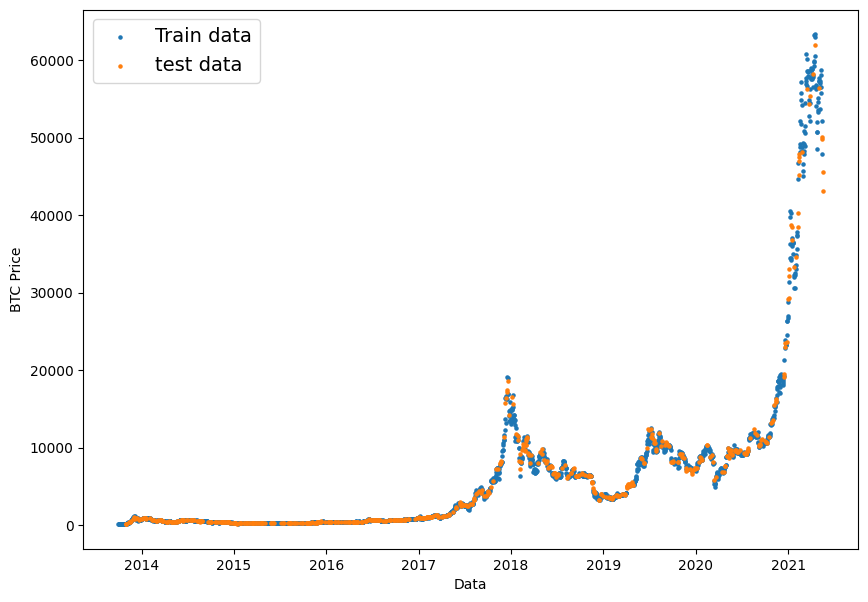

In [13]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="test data")
plt.xlabel("Data")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

### Create train & test sets for time series (the right way)

In [14]:
# Create train and test splits the right way for time series data
split_size = int(0.8*len(prices)) # 80% train, 20% test - you change these values as needed, e.g 90/10, 95/5

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyind the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

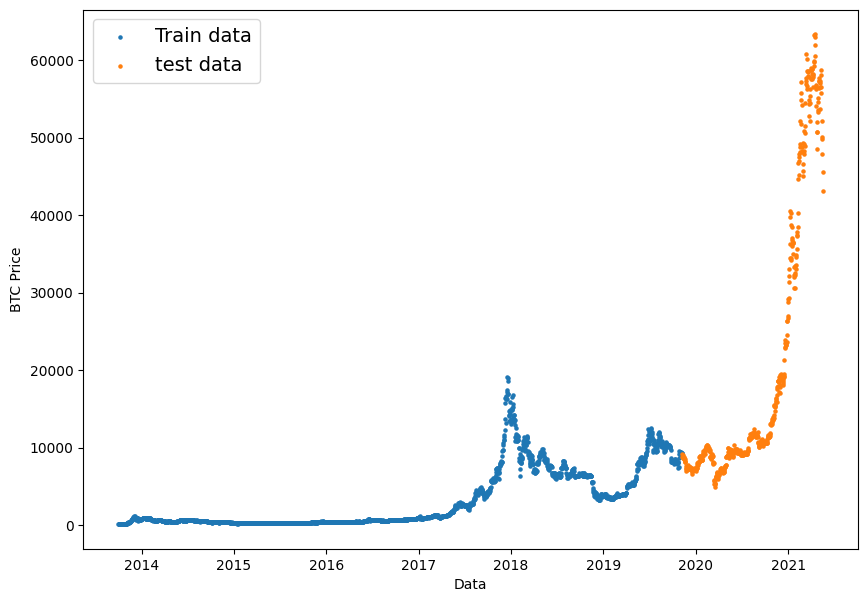

In [15]:
# Plot correctly made splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="test data")
plt.xlabel("Data")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

### Create a plotting function
Typing plotting code is tedious, let's functionize it.

In [16]:
# Create the function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  # Plot correctly made splits
  """
  Plot timesteps (a series of points in time) against values (a series of values accros timesteps).

  Parameters
  ----------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None
  """
  # Plot the series
  #plt.figure(figsize=(10,7))
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

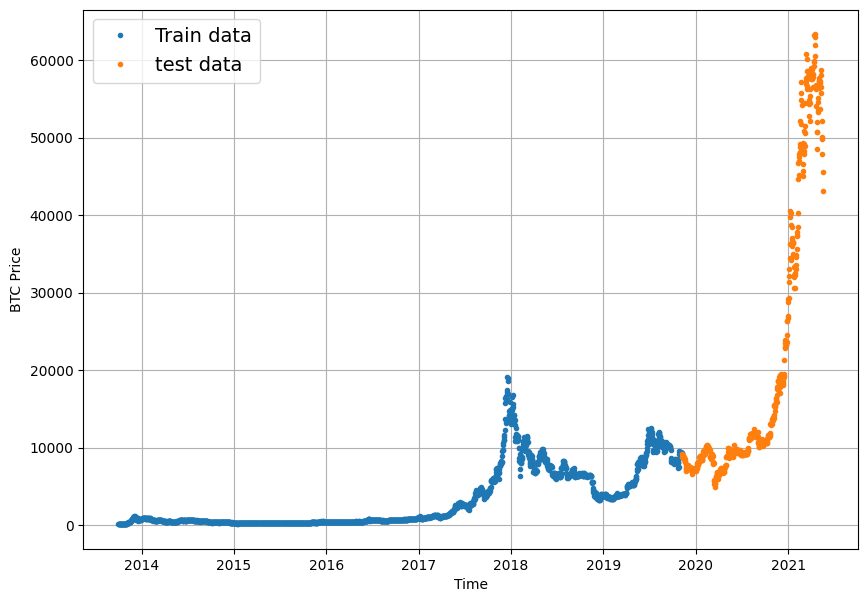

In [17]:
# Test out plotting function
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="test data")

## Modelling Experiments 

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with: 
* **Horizon** = number of timesteps into the future we're going to predict
* **Window size** = number of timesteps we're going to use to predict horizon  

Modelling experiments we're running:
 
* 0	Naïve model (baseline)
* 1	Dense model, horizon = 1, window =1
* 2	Same as 1, horizon = 1, window=	30
* 3	Same as 1, horizo1 = 7, window =	30
* 4	Conv1D	1	7
* 5	LSTM	1	7
* 6	Same as 1 (but with multivariate data)	1	7	Block reward size
* 7	N-BEATs Algorithm	1	7
* 8	Ensemble (multiple models optimized on different loss functions)	1	7
* 9	Future prediction model (model to predict future values)	1	7	
* 10	Same as 1 (but with turkey 🦃 data introduced)	1	7

## Model 0: Naive forecast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [18]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

In [19]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

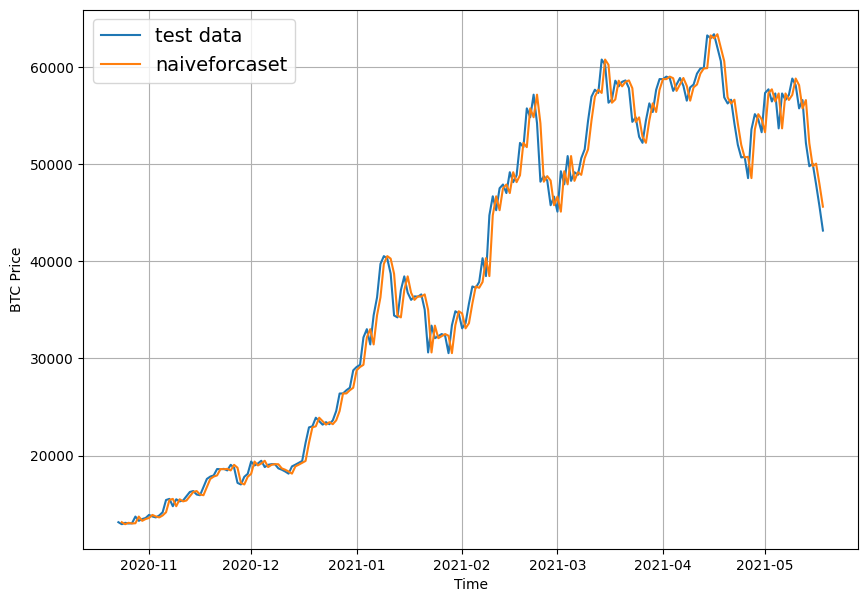

In [20]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
#plot_time_series(timesteps=X_train, values=y_train, label="train data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, label="naiveforcaset", format="-")

> **Exercice:** Spend 10 minutes reading the simple forcasts chapter of Forcasting: Principles in Practice. ANd have a search to find out why the naive forcast is hard to beat, does the term autoregressive come up ?

## Evaluating a time series model 

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression like metrics.

A few common regression metrics (whhich can also be used for time series forecasting):
* MAE - mean absolute error.
* MSE - mean squared error.
* RMSE - root mean square error.
* MAPE/sMAPE - (symmetric) mean absolute percentage error.
* MASE - mean abslute scaled error.

For all of the above metrics, **lower is better** for example, for a model achieves an MAE of 0 that is better than an MAE of 100. 

The main thing we're evaluating here is : **how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values) ?**

**Ressource: For a deeper dive on the various kinds of time series forecasting methode see Forecasting :[ Principles and Practice chapter 5.8](https://otexts.com/fpp3/accuracy.html)**
https://www.sktime.net/en/latest/api_reference/auto_generated/sktime.performance_metrics.forecasting.mean_absolute_scaled_error.html?highlight=MASE%20output%20is%20on#sktime.performance_metrics.forecasting.mean_absolute_scaled_error

In [21]:
import tensorflow as tf 

In [22]:
# MASE implementation
# calculate the mean absolute scaled error
# calculate the mean absolute scaled error

# scale = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
# error = tf.reduce_mean(tf.abs(y_pred - y_true))
# mase = error / scale

In [23]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
     
  # Find MAE of naive forecast
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1))
     
  return mae / mae_naive_no_season

In [24]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [25]:
# Create a function to take in model predictions and truth values and return evaluation metrics

import tensorflow as tf

def evaluate_preds(y_true, y_pred):
    
    # Make sure float32 datatype (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Vérifier si y_true et y_pred ont la même forme
    if len(y_true.shape) > 1 or len(y_pred.shape) > 1:
      # Aplatir y_true et y_pred s'ils ont des formes différentes
      y_true = tf.reshape(y_true, [-1])
      y_pred = tf.reshape(y_pred, [-1])

    # Calculate various evaluation metrics 
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {"mae": mae.numpy(),
            "mape": mape.numpy(),
            "mase": mase.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy()}

In [26]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [27]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [28]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [29]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Other models you can use for baselines and for actual forecasts

In this notebook, we're focused on TensorFlow and deep learning models.

However therer are plenty of other styles of time series forecasting models you may want to experiment with: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

## Format Data Part 2: Windowing our dataset

Why do we window ?

We window our time series dataset to turn oue data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [30]:
len(y_train)

2229

In [31]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]}  to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795]  to predict this: 123.033


In [32]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [33]:
# Create function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  input: [0,1,2,3,4,5,6,7] -> Output: ([0,1,2,3,4,5,6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [34]:
# Test out the window labelling function
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()}-> Label: {tf.squeeze(test_label.numpy())}")

Window: [0 1 2 3 4 5 6]-> Label: 7


We've got a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this with Python for loops, however, for large time series, that'd be quite slow.

To speed things up, we'll leverage NumPy's array indexing - https://numpy.org/doc/stable/reference/arrays.indexing.html

Our function will:
1. Create a window step of specific window size (e.g. [0,1,2,3,4,5,6])

2. Use NumPy indexing to create a 2D array of multiple window steps, for example:
```
[[0,1,2,3,4,5,6],
[0,1,2,3,4,5,6],
[0,1,2,3,4,5,6]]
```
3. Use the 2D array of multiple window steps (from 2. ) to index on a target series (e.g. historical price of Bitcoin)
4. Use our `get_labelled_windows()` function we created above to rurn the window steps into the window steps into windows with a specified horizon.

> **Resource:** The function we're about to create has been adapted from the following article : https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [35]:
# Create function to view NumPy arrays as windows 

def make_windows(x, window_size= WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size 

  #print(f"Window indexes: \n{window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)

  return windows, labels

In [36]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [37]:
# View the firs 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [38]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


In [39]:
prices[-1]

43144.4712908603

**Note:** You can find a function which achieves similar results to the ones we implemented above at [tf.keras.preprocessing.timeseries_dataset_from_array() ](https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array). Just like ours, it takes in an array and returns a windowed dataset. It has the benefit of returning data in the form of a tf.data.Dataset instance (we'll see how to do this with our own data later).

## Turning windows into training and test sets

In [40]:
#full_windows : c'est la separation du dataset sous forme listes de liste x c'est le nombre de windows pour ensuite determiné l horizon qui est windows +1, la valeur qui suit le window (ex 7 pour window et le 8eme  c'est l'horizon )

In [41]:
full_windows[1], full_labels[1]


(array([125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ]),
 array([124.049]))

In [42]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [43]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [44]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [45]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [46]:
# check to see if train labels are the same (before and after window split )
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:]) 

True

## Make a modelling checkpoint callback

Because our model's performance will fluctuate from experiment to experiment, we're goind to write a model checkpoint so we can compare apples to appeles.

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example f our model performs the best on epoch 55 (but we're training for 100 epochs), we want to lead and evaluate the model saved on epoch 55. 

We can create a modelling checkpoint callback using this following : https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint 

In [47]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(
      filepath=os.path.join(save_path, model_name),
      verbose=0, # only output a limited amount of text
      #monitor='val_loss',  # monitor validation loss
      #mode='min',  # minimize validation loss
      save_best_only=True  # save only the best model
      )

## Model 1 : Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimization and MAE loss function
* Batch size of 128 (previously we've used 32)
* 100 epochs 

Why these values?

I picked them out of experimentation.

*  **Hyperparameters** = values a machine learning practitioner (you!) can adjust themselves.
* **Parameters** = values a model learns on its own.

In [48]:
import tensorflow as tf

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON, activation="linear"), # linear activation is the same as having no activation
], name="model_1_dense") # name our model so we can save it 

# 2. Compile the model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])
# 3. Fit the model
history_model_1 = model_1.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(test_windows,test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
13/18 [====================>.........] - ETA: 0s - loss: 1519.1647 - mae: 1519.1647 - mse: 6514629.5000   

18/18 [==============================] - 9s 88ms/step - loss: 1206.2688 - mae: 1206.2688 - mse: 4937139.0000 - val_loss: 1832.2561 - val_mae: 1832.2561 - val_mse: 8868791.0000
Epoch 2/100
14/18 [======================>.......] - ETA: 0s - loss: 336.5897 - mae: 336.5897 - mse: 454286.5312

18/18 [==============================] - 1s 77ms/step - loss: 317.8890 - mae: 317.8890 - mse: 409782.3438 - val_loss: 1646.6035 - val_mae: 1646.6035 - val_mse: 6440725.0000
Epoch 3/100
11/18 [=================>............] - ETA: 0s - loss: 206.4925 - mae: 206.4925 - mse: 212015.3594

18/18 [==============================] - 2s 89ms/step - loss: 197.8393 - mae: 197.8393 - mse: 195947.5938 - val_loss: 1222.9452 - val_mae: 1222.9452 - val_mse: 3914440.2500
Epoch 4/100
12/18 [===================>..........] - ETA: 0s - loss: 180.8428 - mae: 180.8428 - mse: 171119.0156

18/18 [==============================] - 1s 47ms/step - loss: 169.1470 - mae: 169.1470 - mse: 151738.5000 - val_loss: 900.8088 - val_mae: 900.8088 - val_mse: 2580723.0000
Epoch 5/100
13/18 [====================>.........] - ETA: 0s - loss: 157.1946 - mae: 157.1946 - mse: 137836.9062

18/18 [==============================] - 1s 46ms/step - loss: 154.2900 - mae: 154.2900 - mse: 133035.3750 - val_loss: 853.9014 - val_mae: 853.9014 - val_mse: 2363633.2500
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 154.0572 - mae: 154.0572 - mse: 128574.3594

18/18 [==============================] - 1s 32ms/step - loss: 154.0572 - mae: 154.0572 - mse: 128574.3594 - val_loss: 836.9243 - val_mae: 836.9243 - val_mse: 2264642.7500
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 179.3254 - mae: 179.3254 - mse: 248277.6875

18/18 [==============================] - 1s 33ms/step - loss: 148.8440 - mae: 148.8440 - mse: 123068.1875 - val_loss: 809.2236 - val_mae: 809.2236 - val_mse: 2178715.0000
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 114.0480 - mae: 114.0480 - mse: 52370.2891

18/18 [==============================] - 1s 32ms/step - loss: 146.0932 - mae: 146.0932 - mse: 118887.8281 - val_loss: 794.4409 - val_mae: 794.4409 - val_mse: 2113978.0000
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 144.5257 - mae: 144.5257 - mse: 117729.5938 - val_loss: 807.1361 - val_mae: 807.1361 - val_mse: 2050472.5000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 148.9323 - mae: 148.9323 - mse: 155375.3438

18/18 [==============================] - 1s 45ms/step - loss: 142.0942 - mae: 142.0942 - mse: 115241.2344 - val_loss: 770.6260 - val_mae: 770.6260 - val_mse: 1938317.8750
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 138.1103 - mae: 138.1103 - mse: 88405.3594

18/18 [==============================] - 1s 32ms/step - loss: 137.0685 - mae: 137.0685 - mse: 107640.9375 - val_loss: 757.6882 - val_mae: 757.6882 - val_mse: 1873014.7500
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 134.5237 - mae: 134.5237 - mse: 104780.6484 - val_loss: 803.8682 - val_mae: 803.8682 - val_mse: 1966645.8750
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 138.2426 - mae: 138.2426 - mse: 106127.0156 - val_loss: 787.2611 - val_mae: 787.2611 - val_mse: 1901944.1250
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 134.6852 - mae: 134.6852 - mse: 73177.4453

18/18 [==============================] - 1s 33ms/step - loss: 132.0100 - mae: 132.0100 - mse: 100478.4922 - val_loss: 740.6252 - val_mae: 740.6252 - val_mse: 1760536.5000
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 137.5359 - mae: 137.5359 - mse: 76940.7812

18/18 [==============================] - 1s 33ms/step - loss: 131.0655 - mae: 131.0655 - mse: 98804.3125 - val_loss: 712.3582 - val_mae: 712.3582 - val_mse: 1714989.3750
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 128.2449 - mae: 128.2449 - mse: 95662.1875 - val_loss: 714.0490 - val_mae: 714.0490 - val_mse: 1669402.7500
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 113.0628 - mae: 113.0628 - mse: 57285.4297

18/18 [==============================] - 1s 34ms/step - loss: 126.2453 - mae: 126.2453 - mse: 94163.6094 - val_loss: 698.8453 - val_mae: 698.8453 - val_mse: 1625055.5000
Epoch 18/100
18/18 [==============================] - ETA: 0s - loss: 125.8494 - mae: 125.8494 - mse: 93293.4062 

18/18 [==============================] - 1s 32ms/step - loss: 125.8494 - mae: 125.8494 - mse: 93293.4062 - val_loss: 687.3313 - val_mae: 687.3313 - val_mse: 1609069.5000
Epoch 19/100
17/18 [===========================>..] - ETA: 0s - loss: 126.6987 - mae: 126.6987 - mse: 93554.8750

18/18 [==============================] - 1s 33ms/step - loss: 125.9651 - mae: 125.9651 - mse: 93064.3203 - val_loss: 682.1840 - val_mae: 682.1840 - val_mse: 1567509.6250
Epoch 20/100
18/18 [==============================] - ETA: 0s - loss: 128.7786 - mae: 128.7786 - mse: 95843.5469 

18/18 [==============================] - 1s 32ms/step - loss: 128.7786 - mae: 128.7786 - mse: 95843.5469 - val_loss: 673.4001 - val_mae: 673.4001 - val_mse: 1549663.0000
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 133.8351 - mae: 133.8351 - mse: 85099.4766

18/18 [==============================] - 1s 33ms/step - loss: 128.9927 - mae: 128.9927 - mse: 95455.4453 - val_loss: 671.7314 - val_mae: 671.7314 - val_mse: 1526893.6250
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 122.5208 - mae: 122.5208 - mse: 89120.4141 - val_loss: 678.3829 - val_mae: 678.3829 - val_mse: 1527475.1250
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 119.0550 - mae: 119.0550 - mse: 65898.7031

18/18 [==============================] - 1s 35ms/step - loss: 122.2848 - mae: 122.2848 - mse: 88153.4531 - val_loss: 658.8479 - val_mae: 658.8479 - val_mse: 1492597.2500
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 122.5356 - mae: 122.5356 - mse: 90222.9922

18/18 [==============================] - 1s 33ms/step - loss: 121.1963 - mae: 121.1963 - mse: 88630.5703 - val_loss: 658.5352 - val_mae: 658.5352 - val_mse: 1498952.0000
Epoch 25/100
18/18 [==============================] - 0s 6ms/step - loss: 121.1551 - mae: 121.1551 - mse: 86462.3750 - val_loss: 683.0964 - val_mae: 683.0964 - val_mse: 1589182.1250
Epoch 26/100
18/18 [==============================] - 0s 6ms/step - loss: 124.3804 - mae: 124.3804 - mse: 88132.8906 - val_loss: 665.6218 - val_mae: 665.6218 - val_mse: 1524323.3750
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 127.8911 - mae: 127.8911 - mse: 90520.2500 - val_loss: 716.5787 - val_mae: 716.5787 - val_mse: 1692533.1250
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 129.3860 - mae: 129.3860 - mse: 76716.4062

18/18 [==============================] - 1s 32ms/step - loss: 123.9295 - mae: 123.9295 - mse: 87870.5078 - val_loss: 641.2488 - val_mae: 641.2488 - val_mse: 1422189.8750
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 123.1765 - mae: 123.1765 - mse: 88537.8281 - val_loss: 727.3802 - val_mae: 727.3802 - val_mse: 1597407.5000
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 126.9947 - mae: 126.9947 - mse: 90098.9609 - val_loss: 765.7922 - val_mae: 765.7922 - val_mse: 1698760.2500
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 131.7972 - mae: 131.7972 - mse: 92857.9688 - val_loss: 899.9452 - val_mae: 899.9452 - val_mse: 2138000.5000
Epoch 32/100
12/18 [===================>..........] - ETA: 0s - loss: 141.5164 - mae: 141.5164 - mse: 99062.9766

18/18 [==============================] - 1s 48ms/step - loss: 134.5973 - mae: 134.5973 - mse: 91202.6562 - val_loss: 637.7230 - val_mae: 637.7230 - val_mse: 1411767.1250
Epoch 33/100
18/18 [==============================] - 0s 8ms/step - loss: 123.5158 - mae: 123.5158 - mse: 82533.6406 - val_loss: 681.6792 - val_mae: 681.6792 - val_mse: 1559193.7500
Epoch 34/100
18/18 [==============================] - 0s 11ms/step - loss: 120.0266 - mae: 120.0266 - mse: 83578.2578 - val_loss: 651.6891 - val_mae: 651.6891 - val_mse: 1459634.1250
Epoch 35/100
18/18 [==============================] - 0s 8ms/step - loss: 116.8193 - mae: 116.8193 - mse: 82743.7812 - val_loss: 649.4055 - val_mae: 649.4055 - val_mse: 1395944.1250
Epoch 36/100
18/18 [==============================] - 0s 8ms/step - loss: 124.4575 - mae: 124.4575 - mse: 85136.3281 - val_loss: 733.2405 - val_mae: 733.2405 - val_mse: 1588125.8750
Epoch 37/100
18/18 [==============================] - 0s 7ms/step - loss: 118.1179 - mae: 118.1179 - 

18/18 [==============================] - 1s 46ms/step - loss: 116.0689 - mae: 116.0689 - mse: 80426.7812 - val_loss: 624.0852 - val_mae: 624.0852 - val_mse: 1348902.6250
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 116.5321 - mae: 116.5321 - mse: 81089.3516 - val_loss: 689.0135 - val_mae: 689.0135 - val_mse: 1566704.7500
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 116.1901 - mae: 116.1901 - mse: 80237.7422 - val_loss: 627.1149 - val_mae: 627.1149 - val_mse: 1369369.6250
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 114.0870 - mae: 114.0870 - mse: 79147.2969 - val_loss: 634.8112 - val_mae: 634.8112 - val_mse: 1393360.5000
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 105.0178 - mae: 105.0178 - mse: 54282.2891

18/18 [==============================] - 1s 32ms/step - loss: 116.9801 - mae: 116.9801 - mse: 81503.1094 - val_loss: 619.4053 - val_mae: 619.4053 - val_mse: 1343800.2500
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9940 - mae: 112.9940 - mse: 78090.2422 - val_loss: 625.1286 - val_mae: 625.1286 - val_mse: 1360986.5000
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 114.9108 - mae: 114.9108 - mse: 79050.5312 - val_loss: 647.9320 - val_mae: 647.9320 - val_mse: 1426170.8750
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 81.4555 - mae: 81.4555 - mse: 37791.8125

18/18 [==============================] - 1s 31ms/step - loss: 113.6821 - mae: 113.6821 - mse: 79483.7656 - val_loss: 619.2510 - val_mae: 619.2510 - val_mse: 1319304.0000
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 113.5628 - mae: 113.5628 - mse: 77982.4531 - val_loss: 622.5877 - val_mae: 622.5877 - val_mse: 1349762.1250
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 115.3781 - mae: 115.3781 - mse: 80721.8359 - val_loss: 661.5549 - val_mae: 661.5549 - val_mse: 1390428.6250
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 116.1275 - mae: 116.1275 - mse: 78306.9297 - val_loss: 701.8964 - val_mae: 701.8964 - val_mse: 1484716.7500
Epoch 49/100
17/18 [===========================>..] - ETA: 0s - loss: 117.7659 - mae: 117.7659 - mse: 79981.9766 

18/18 [==============================] - 1s 49ms/step - loss: 116.9342 - mae: 116.9342 - mse: 79116.7812 - val_loss: 614.1285 - val_mae: 614.1285 - val_mse: 1305049.1250
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 112.2180 - mae: 112.2180 - mse: 77648.2422 - val_loss: 651.7577 - val_mae: 651.7577 - val_mse: 1429343.3750
Epoch 51/100
18/18 [==============================] - ETA: 0s - loss: 113.4538 - mae: 113.4538 - mse: 77428.6641

18/18 [==============================] - 1s 32ms/step - loss: 113.4538 - mae: 113.4538 - mse: 77428.6641 - val_loss: 610.8882 - val_mae: 610.8882 - val_mse: 1296927.2500
Epoch 52/100
17/18 [===========================>..] - ETA: 0s - loss: 112.1264 - mae: 112.1264 - mse: 78117.8984

18/18 [==============================] - 1s 33ms/step - loss: 111.5265 - mae: 111.5265 - mse: 77127.2500 - val_loss: 606.5596 - val_mae: 606.5596 - val_mse: 1295850.3750
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 112.4250 - mae: 112.4250 - mse: 77064.8203 - val_loss: 621.1268 - val_mae: 621.1268 - val_mse: 1305567.2500
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1616 - mae: 112.1616 - mse: 76277.2344 - val_loss: 615.9910 - val_mae: 615.9910 - val_mse: 1296925.7500
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 114.3170 - mae: 114.3170 - mse: 79006.5547 - val_loss: 625.1951 - val_mae: 625.1951 - val_mse: 1347897.0000
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 115.4661 - mae: 115.4661 - mse: 78468.8906 - val_loss: 819.2067 - val_mae: 819.2067 - val_mse: 1964445.0000
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 126.6688 - mae: 126.6688 - m

18/18 [==============================] - 1s 32ms/step - loss: 111.8054 - mae: 111.8054 - mse: 75155.7344 - val_loss: 599.3212 - val_mae: 599.3212 - val_mse: 1269478.0000
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 109.4202 - mae: 109.4202 - mse: 74506.5938 - val_loss: 603.2553 - val_mae: 603.2553 - val_mse: 1267387.3750
Epoch 64/100
18/18 [==============================] - 0s 7ms/step - loss: 109.4142 - mae: 109.4142 - mse: 74245.2266 - val_loss: 609.7460 - val_mae: 609.7460 - val_mse: 1276277.6250
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6757 - mae: 110.6757 - mse: 75594.9531 - val_loss: 605.3328 - val_mae: 605.3328 - val_mse: 1267009.6250
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4200 - mae: 109.4200 - mse: 74388.7578 - val_loss: 602.8679 - val_mae: 602.8679 - val_mse: 1262548.5000
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 110.1453 - mae: 110.1453 - m

18/18 [==============================] - 1s 33ms/step - loss: 109.9032 - mae: 109.9032 - mse: 74504.5781 - val_loss: 592.5312 - val_mae: 592.5312 - val_mse: 1244930.1250
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2581 - mae: 109.2581 - mse: 73558.8672 - val_loss: 593.3640 - val_mae: 593.3640 - val_mse: 1247963.7500
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 161.6329 - mae: 161.6329 - mse: 182841.2500

18/18 [==============================] - 1s 31ms/step - loss: 109.1219 - mae: 109.1219 - mse: 74145.6797 - val_loss: 592.2712 - val_mae: 592.2712 - val_mse: 1243165.6250
Epoch 75/100
18/18 [==============================] - 0s 7ms/step - loss: 109.9578 - mae: 109.9578 - mse: 73263.4531 - val_loss: 610.4846 - val_mae: 610.4846 - val_mse: 1265159.3750
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 112.6662 - mae: 112.6662 - mse: 75679.3828 - val_loss: 605.6509 - val_mae: 605.6509 - val_mse: 1279789.1250
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2583 - mae: 111.2583 - mse: 74077.6172 - val_loss: 595.0720 - val_mae: 595.0720 - val_mse: 1251215.2500
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8883 - mae: 110.8883 - mse: 73752.0312 - val_loss: 593.4440 - val_mae: 593.4440 - val_mse: 1239319.0000
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 110.7638 - mae: 110.7638 - m

18/18 [==============================] - 1s 33ms/step - loss: 112.7918 - mae: 112.7918 - mse: 75409.0078 - val_loss: 591.8241 - val_mae: 591.8241 - val_mse: 1241125.2500
Epoch 81/100
17/18 [===========================>..] - ETA: 0s - loss: 107.5908 - mae: 107.5908 - mse: 72819.0234

18/18 [==============================] - 1s 32ms/step - loss: 107.9726 - mae: 107.9726 - mse: 73011.0312 - val_loss: 589.4822 - val_mae: 589.4822 - val_mse: 1232064.7500
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 117.2668 - mae: 117.2668 - mse: 79291.7734 - val_loss: 619.7283 - val_mae: 619.7283 - val_mse: 1315171.6250
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6933 - mae: 109.6933 - mse: 73527.5312 - val_loss: 631.2482 - val_mae: 631.2482 - val_mse: 1341609.2500
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 110.4625 - mae: 110.4625 - mse: 74158.9062 - val_loss: 591.8276 - val_mae: 591.8276 - val_mse: 1231856.1250
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 108.0488 - mae: 108.0488 - mse: 72780.9219 - val_loss: 590.3043 - val_mae: 590.3043 - val_mse: 1227456.7500
Epoch 86/100
18/18 [==============================] - 0s 8ms/step - loss: 109.7585 - mae: 109.7585 - m

18/18 [==============================] - 1s 48ms/step - loss: 108.6464 - mae: 108.6464 - mse: 73452.2734 - val_loss: 589.4691 - val_mae: 589.4691 - val_mse: 1230418.3750
Epoch 89/100
18/18 [==============================] - 0s 8ms/step - loss: 107.4610 - mae: 107.4610 - mse: 70890.7109 - val_loss: 601.0914 - val_mae: 601.0914 - val_mse: 1239957.0000
Epoch 90/100
18/18 [==============================] - 0s 8ms/step - loss: 109.0336 - mae: 109.0336 - mse: 69742.7656 - val_loss: 631.8412 - val_mae: 631.8412 - val_mse: 1297089.5000
Epoch 91/100
18/18 [==============================] - 0s 8ms/step - loss: 113.3943 - mae: 113.3943 - mse: 74861.7812 - val_loss: 611.2676 - val_mae: 611.2676 - val_mse: 1285794.1250
Epoch 92/100
18/18 [==============================] - 0s 7ms/step - loss: 108.6997 - mae: 108.6997 - mse: 73050.4688 - val_loss: 599.2733 - val_mae: 599.2733 - val_mse: 1255913.2500
Epoch 93/100
18/18 [==============================] - 0s 8ms/step - loss: 114.1265 - mae: 114.1265 - m

18/18 [==============================] - 1s 33ms/step - loss: 113.7558 - mae: 113.7558 - mse: 74473.3672 - val_loss: 584.4866 - val_mae: 584.4866 - val_mse: 1211322.2500
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4151 - mae: 110.4151 - mse: 73126.6562 - val_loss: 587.9186 - val_mae: 587.9186 - val_mse: 1214441.8750
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 111.0226 - mae: 111.0226 - mse: 71640.1797 - val_loss: 653.8588 - val_mae: 653.8588 - val_mse: 1343211.0000


In [49]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [50]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 653.8586 - mae: 653.8586 - mse: 1343210.8750


[653.8585815429688, 653.8585815429688, 1343210.875]

In [51]:
# Load in saved performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 584.4866 - mae: 584.4866 - mse: 1211322.3750


[584.486572265625, 584.486572265625, 1211322.375]

In [52]:
 naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Making forecssts with a model (on the test dataset)

To make "forecasts" on the test dataset (note: these won't be actual forecasts, they're only psuedo forecasts because actual forecasts are into the future), let's write a function to:

1. Take in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's `predict()`
4. Returns the predictions.
 


In [53]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [54]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8875.737 , 8717.185 , 8983.6455, 8814.531 , 8689.901 , 8711.839 ,
        8710.521 , 8464.416 , 8445.258 , 8498.699 ], dtype=float32)>)

In [55]:
model_1_preds.shape, tf.squeeze(test_labels).shape

(TensorShape([556]), TensorShape([556]))

In [56]:
# Evaluate preds
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_1_preds)
model_1_results

{'mae': 584.4866,
 'mape': 2.6362236,
 'mase': 1.026781,
 'mse': 1211322.4,
 'rmse': 1100.6008}

## Model 2 : Dense (window = 30, horizon = 1)

In [57]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past 

In [58]:
# Make windowe data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [59]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                               labels=full_labels,
                                                                               test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [60]:
train_windows[0], train_labels[0]

(array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ]),
 array([196.02499]))

In [ ]:
import tensorflow as tf

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON, activation="linear"), # linear activation is the same as having no activation
], name="model_2") # name our model so we can save it 

# 2. Compile the model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])
# 3. Fit the model
history_model_2 = model_2.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(test_windows,test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 16s - loss: 3242.1387 - mae: 3242.1387 - mse: 25991964.0000

18/18 [==============================] - 2s 42ms/step - loss: 1144.5331 - mae: 1144.5331 - mse: 5416632.5000 - val_loss: 4443.9019 - val_mae: 4443.9019 - val_mse: 40248716.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 615.3298 - mae: 615.3298 - mse: 1348919.2500

18/18 [==============================] - 1s 32ms/step - loss: 398.6689 - mae: 398.6689 - mse: 673779.3750 - val_loss: 1484.7433 - val_mae: 1484.7433 - val_mse: 6404866.0000
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 270.3725 - mae: 270.3725 - mse: 333718.2188

18/18 [==============================] - 1s 47ms/step - loss: 270.3725 - mae: 270.3725 - mse: 333718.2188 - val_loss: 1290.0532 - val_mae: 1290.0532 - val_mse: 5263854.5000
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 223.1742 - mae: 223.1742 - mse: 239559.8125

18/18 [==============================] - 1s 34ms/step - loss: 225.1535 - mae: 225.1535 - mse: 241742.2031 - val_loss: 1117.9425 - val_mae: 1117.9425 - val_mse: 4171441.5000
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 205.0658 - mae: 205.0658 - mse: 197964.8438 - val_loss: 1145.0308 - val_mae: 1145.0308 - val_mse: 3949069.0000
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 195.3552 - mae: 195.3552 - mse: 183030.7969 - val_loss: 1208.3147 - val_mae: 1208.3147 - val_mse: 4613112.0000
Epoch 7/100
17/18 [===========================>..] - ETA: 0s - loss: 184.8701 - mae: 184.8701 - mse: 168686.4219

18/18 [==============================] - 1s 33ms/step - loss: 184.8935 - mae: 184.8935 - mse: 168030.5625 - val_loss: 973.6316 - val_mae: 973.6316 - val_mse: 3049765.0000
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 186.4015 - mae: 186.4015 - mse: 166726.5000

18/18 [==============================] - 1s 38ms/step - loss: 174.4400 - mae: 174.4400 - mse: 153024.4219 - val_loss: 944.2672 - val_mae: 944.2672 - val_mse: 2883633.2500
Epoch 9/100
13/18 [====================>.........] - ETA: 0s - loss: 170.3389 - mae: 170.3389 - mse: 145513.0312

18/18 [==============================] - 1s 48ms/step - loss: 166.2209 - mae: 166.2209 - mse: 140445.7812 - val_loss: 923.4551 - val_mae: 923.4551 - val_mse: 2764947.7500
Epoch 10/100
18/18 [==============================] - 0s 8ms/step - loss: 165.7033 - mae: 165.7033 - mse: 138241.7344 - val_loss: 1098.8431 - val_mae: 1098.8431 - val_mse: 3355698.7500
Epoch 11/100
18/18 [==============================] - 0s 8ms/step - loss: 174.1816 - mae: 174.1816 - mse: 145183.7031 - val_loss: 1298.6830 - val_mae: 1298.6830 - val_mse: 4295320.0000
Epoch 12/100
14/18 [======================>.......] - ETA: 0s - loss: 194.2039 - mae: 194.2039 - mse: 172764.8906

18/18 [==============================] - 1s 47ms/step - loss: 191.4504 - mae: 191.4504 - mse: 166068.7969 - val_loss: 886.9489 - val_mae: 886.9489 - val_mse: 2711822.5000
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 156.5251 - mae: 156.5251 - mse: 125147.1797 - val_loss: 1080.9723 - val_mae: 1080.9723 - val_mse: 3644439.7500
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 236.2110 - mae: 236.2110 - mse: 235150.8906

18/18 [==============================] - 1s 30ms/step - loss: 158.6351 - mae: 158.6351 - mse: 127958.9844 - val_loss: 849.5274 - val_mae: 849.5274 - val_mse: 2511429.0000
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 203.8365 - mae: 203.8365 - mse: 186321.8594

18/18 [==============================] - 1s 33ms/step - loss: 151.3535 - mae: 151.3535 - mse: 114493.2109 - val_loss: 811.6240 - val_mae: 811.6240 - val_mse: 2300425.2500
Epoch 16/100
17/18 [===========================>..] - ETA: 0s - loss: 152.5971 - mae: 152.5971 - mse: 109965.6562

18/18 [==============================] - 1s 31ms/step - loss: 154.4397 - mae: 154.4397 - mse: 115805.5703 - val_loss: 794.7521 - val_mae: 794.7521 - val_mse: 2145285.5000
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 143.9076 - mae: 143.9076 - mse: 108465.8672 - val_loss: 1099.4202 - val_mae: 1099.4202 - val_mse: 3203111.7500
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 166.5357 - mae: 166.5357 - mse: 131285.7969 - val_loss: 1060.3939 - val_mae: 1060.3939 - val_mse: 3046216.2500
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 152.9602 - mae: 152.9602 - mse: 113513.5391 - val_loss: 1172.6708 - val_mae: 1172.6708 - val_mse: 3871148.0000
Epoch 20/100
18/18 [==============================] - 0s 5ms/step - loss: 157.9129 - mae: 157.9129 - mse: 116768.2109 - val_loss: 986.7590 - val_mae: 986.7590 - val_mse: 2964300.0000
Epoch 21/100
18/18 [==============================] - 0s 5ms/step - loss: 173.6733 - mae: 1

18/18 [==============================] - 1s 32ms/step - loss: 140.5037 - mae: 140.5037 - mse: 99098.7188 - val_loss: 758.6520 - val_mae: 758.6520 - val_mse: 2000488.1250
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 133.8021 - mae: 133.8021 - mse: 93782.1953 - val_loss: 837.0074 - val_mae: 837.0074 - val_mse: 2112284.0000
Epoch 26/100
18/18 [==============================] - 0s 6ms/step - loss: 147.6285 - mae: 147.6285 - mse: 106067.3516 - val_loss: 852.7363 - val_mae: 852.7363 - val_mse: 2310720.5000
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 157.1842 - mae: 157.1842 - mse: 113998.8438 - val_loss: 859.1715 - val_mae: 859.1715 - val_mse: 2318595.2500
Epoch 28/100
18/18 [==============================] - 0s 6ms/step - loss: 142.3060 - mae: 142.3060 - mse: 98460.2734 - val_loss: 847.6819 - val_mae: 847.6819 - val_mse: 2258483.0000
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 135.3672 - mae: 135.3672 -

18/18 [==============================] - 1s 32ms/step - loss: 131.3834 - mae: 131.3834 - mse: 92356.8047 - val_loss: 676.2963 - val_mae: 676.2963 - val_mse: 1629888.7500
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 139.4251 - mae: 139.4251 - mse: 95108.1250 - val_loss: 904.9388 - val_mae: 904.9388 - val_mse: 2313263.7500
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 131.0297 - mae: 131.0297 - mse: 89479.1406 - val_loss: 729.5441 - val_mae: 729.5441 - val_mse: 1810764.0000
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 127.4559 - mae: 127.4559 - mse: 85267.6328 - val_loss: 792.6720 - val_mae: 792.6720 - val_mse: 2010480.8750
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 154.7157 - mae: 154.7157 - mse: 169512.5312

18/18 [==============================] - 1s 32ms/step - loss: 130.2289 - mae: 130.2289 - mse: 88111.3516 - val_loss: 665.6931 - val_mae: 665.6931 - val_mse: 1591798.7500
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 133.0433 - mae: 133.0433 - mse: 89828.3281 - val_loss: 956.5930 - val_mae: 956.5930 - val_mse: 2486790.0000
Epoch 37/100
18/18 [==============================] - 0s 6ms/step - loss: 147.9597 - mae: 147.9597 - mse: 97767.1250 - val_loss: 1176.7362 - val_mae: 1176.7362 - val_mse: 3376314.0000
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 209.4333 - mae: 209.4333 - mse: 170301.2188 - val_loss: 1913.5625 - val_mae: 1913.5625 - val_mse: 8080530.5000
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 179.6119 - mae: 179.6119 - mse: 124211.5938 - val_loss: 915.6252 - val_mae: 915.6252 - val_mse: 2322568.7500
Epoch 40/100
18/18 [==============================] - 0s 6ms/step - loss: 167.6301 - mae: 167.63

18/18 [==============================] - 1s 32ms/step - loss: 135.0867 - mae: 135.0867 - mse: 91005.6016 - val_loss: 650.1887 - val_mae: 650.1887 - val_mse: 1504466.5000
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 119.9167 - mae: 119.9167 - mse: 79527.7656 - val_loss: 655.9410 - val_mae: 655.9410 - val_mse: 1516390.5000
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 120.5986 - mae: 120.5986 - mse: 80786.1875 - val_loss: 693.8529 - val_mae: 693.8529 - val_mse: 1629271.6250
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 122.9918 - mae: 122.9918 - mse: 83830.9219 - val_loss: 654.4362 - val_mae: 654.4362 - val_mse: 1497966.2500
Epoch 48/100
14/18 [======================>.......] - ETA: 0s - loss: 116.9745 - mae: 116.9745 - mse: 75128.1016

18/18 [==============================] - 1s 32ms/step - loss: 120.7035 - mae: 120.7035 - mse: 79691.6094 - val_loss: 644.6110 - val_mae: 644.6110 - val_mse: 1489108.6250
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 119.4258 - mae: 119.4258 - mse: 99969.7656

18/18 [==============================] - 1s 32ms/step - loss: 125.2779 - mae: 125.2779 - mse: 83081.9766 - val_loss: 640.4874 - val_mae: 640.4874 - val_mse: 1469910.7500
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 135.2540 - mae: 135.2540 - mse: 88977.3281 - val_loss: 1074.6531 - val_mae: 1074.6531 - val_mse: 3075052.5000
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 138.6842 - mae: 138.6842 - mse: 88097.4922 - val_loss: 1059.4506 - val_mae: 1059.4506 - val_mse: 3004354.7500
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 136.3585 - mae: 136.3585 - mse: 94872.7656 - val_loss: 690.5956 - val_mae: 690.5956 - val_mse: 1566000.8750
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 122.1942 - mae: 122.1942 - mse: 80698.9844 - val_loss: 1261.9399 - val_mae: 1261.9399 - val_mse: 3976647.5000
Epoch 54/100
16/18 [=========================>....] - ETA: 0s - loss: 160.7087 - mae: 160.7087 -

18/18 [==============================] - 1s 49ms/step - loss: 157.8019 - mae: 157.8019 - mse: 105248.0859 - val_loss: 628.5205 - val_mae: 628.5205 - val_mse: 1413773.8750
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 132.4771 - mae: 132.4771 - mse: 87254.8359 - val_loss: 862.9534 - val_mae: 862.9534 - val_mse: 2104038.0000
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 122.6482 - mae: 122.6482 - mse: 80991.2500 - val_loss: 651.9097 - val_mae: 651.9097 - val_mse: 1457592.8750
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 118.1030 - mae: 118.1030 - mse: 76520.5469 - val_loss: 962.4784 - val_mae: 962.4784 - val_mse: 2447948.0000
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 141.3980 - mae: 141.3980 - mse: 96181.4609 - val_loss: 743.5741 - val_mae: 743.5741 - val_mse: 1767512.6250
Epoch 59/100
18/18 [==============================] - ETA: 0s - loss: 157.4003 - mae: 157.4003 - mse:

18/18 [==============================] - 1s 40ms/step - loss: 157.4003 - mae: 157.4003 - mse: 107591.8203 - val_loss: 628.0470 - val_mae: 628.0470 - val_mse: 1417744.6250
Epoch 60/100
18/18 [==============================] - 0s 8ms/step - loss: 119.4195 - mae: 119.4195 - mse: 75364.1094 - val_loss: 696.7064 - val_mae: 696.7064 - val_mse: 1558205.6250
Epoch 61/100
18/18 [==============================] - 0s 10ms/step - loss: 122.7396 - mae: 122.7396 - mse: 79970.9375 - val_loss: 703.5565 - val_mae: 703.5565 - val_mse: 1635440.8750
Epoch 62/100
18/18 [==============================] - 0s 8ms/step - loss: 123.6272 - mae: 123.6272 - mse: 80825.9688 - val_loss: 847.6324 - val_mae: 847.6324 - val_mse: 2119932.0000
Epoch 63/100
18/18 [==============================] - 0s 9ms/step - loss: 127.5352 - mae: 127.5352 - mse: 84733.8984 - val_loss: 739.5958 - val_mae: 739.5958 - val_mse: 1679987.5000
Epoch 64/100
18/18 [==============================] - 0s 9ms/step - loss: 115.9597 - mae: 115.9597 -

18/18 [==============================] - 1s 47ms/step - loss: 117.9797 - mae: 117.9797 - mse: 77842.8828 - val_loss: 611.8149 - val_mae: 611.8149 - val_mse: 1351105.8750
Epoch 67/100
18/18 [==============================] - 0s 8ms/step - loss: 128.7001 - mae: 128.7001 - mse: 84926.8125 - val_loss: 645.8168 - val_mae: 645.8168 - val_mse: 1455035.3750
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 123.1831 - mae: 123.1831 - mse: 81884.3203 - val_loss: 646.9930 - val_mae: 646.9930 - val_mse: 1416804.7500
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 117.6357 - mae: 117.6357 - mse: 77976.9062 - val_loss: 923.5154 - val_mae: 923.5154 - val_mse: 2291297.5000
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 133.4335 - mae: 133.4335 - mse: 88543.9062 - val_loss: 640.8051 - val_mae: 640.8051 - val_mse: 1402262.8750
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 128.3693 - mae: 128.3693 - m

18/18 [==============================] - 1s 31ms/step - loss: 118.0137 - mae: 118.0137 - mse: 76565.5859 - val_loss: 604.0706 - val_mae: 604.0706 - val_mse: 1313583.7500
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 115.8939 - mae: 115.8939 - mse: 76540.0469 - val_loss: 684.9688 - val_mae: 684.9688 - val_mse: 1522829.5000
Epoch 99/100
18/18 [==============================] - 0s 6ms/step - loss: 114.8036 - mae: 114.8036 - mse: 73989.3047 - val_loss: 625.6550 - val_mae: 625.6550 - val_mse: 1370219.6250
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 119.8859 - mae: 119.8859 - mse: 76237.8984 - val_loss: 707.9983 - val_mae: 707.9983 - val_mse: 1593868.3750


In [ ]:
model_2.evaluate(test_windows, test_labels)

In [ ]:
mmodel_2 = tf.keras.models.load_model("model_experiments/model_2/")
model_2.evaluate(test_windows, test_labels)

In [ ]:
model_2_preds = make_preds(model_2,input_data=test_windows)

In [ ]:
tf.squeeze(test_labels).shape, model_2_preds.shape

In [ ]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),y_pred=model_2_preds)
model_2_results

In [ ]:
model_1_results

In [ ]:
offset = 300
plt.figure(figsize=(10,7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values = test_labels[:,0], start=offset, label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values = model_2_preds, start=offset, format="-", label="pred data")

## model 3: Dense (window = 30, horizon=7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

# Make windowe data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                               labels=full_labels,
                                                                               test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)


In [70]:

import tensorflow as tf

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON), # linear activation is the same as having no activation
], name="model_3") # name our model so we can save it 

# 2. Compile the model
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])
# 3. Fit the model
history_model_3 = model_3.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(test_windows,test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_3.name)])

18/18 [==============================] - 0s 8ms/step - loss: 227.0743 - mae: 227.0743 - mse: 275887.3438 - val_loss: 1282.9995 - val_mae: 1282.9995 - val_mse: 5526214.5000
Epoch 82/100
18/18 [==============================] - 0s 8ms/step - loss: 227.8257 - mae: 227.8257 - mse: 275985.1250 - val_loss: 1307.8398 - val_mae: 1307.8398 - val_mse: 5586823.0000
Epoch 83/100
18/18 [==============================] - 0s 8ms/step - loss: 226.7182 - mae: 226.7182 - mse: 276026.7188 - val_loss: 1310.5709 - val_mae: 1310.5709 - val_mse: 5694480.0000
Epoch 84/100
18/18 [==============================] - 0s 8ms/step - loss: 224.0846 - mae: 224.0846 - mse: 273585.4375 - val_loss: 1265.5718 - val_mae: 1265.5718 - val_mse: 5374226.0000
Epoch 85/100
18/18 [==============================] - 0s 7ms/step - loss: 224.9678 - mae: 224.9678 - mse: 272719.8750 - val_loss: 1251.0790 - val_mae: 1251.0790 - val_mse: 5340227.0000
Epoch 86/100
18/18 [==============================] - 0s 8ms/step - loss: 226.1646 - mae

In [71]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1412.6027 - mae: 1412.6027 - mse: 6165892.0000


[1412.6026611328125, 1412.6026611328125, 6165892.0]

In [72]:
mmodel_3 = tf.keras.models.load_model("model_experiments/model_3/")
model_3.evaluate(test_windows, test_labels)


18/18 [==============================] - 0s 2ms/step - loss: 1412.6027 - mae: 1412.6027 - mse: 6165892.0000


[1412.6026611328125, 1412.6026611328125, 6165892.0]

In [73]:
model_3_preds = make_preds(model_3,input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


Make our evaluation function  work for larger horizons

In [74]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),y_pred=model_3_preds)
model_3_results

{'mae': 1412.6027,
 'mape': 6.367997,
 'mase': 2.0580616,
 'mse': 6165892.5,
 'rmse': 2483.1216}

In [75]:
 model_3_results, model_2_results, naive_results

({'mae': 1412.6027,
  'mape': 6.367997,
  'mase': 2.0580616,
  'mse': 6165892.5,
  'rmse': 2483.1216},
 {'mae': 707.99817,
  'mape': 3.3305554,
  'mase': 1.2375878,
  'mse': 1593867.9,
  'rmse': 1262.4847},
 {'mae': 567.9802,
  'mape': 2.516525,
  'mase': 0.99957,
  'mse': 1147547.0,
  'rmse': 1071.2362})

In [76]:
model_3_preds.shape, test_labels[:,0].shape

(TensorShape([551, 7]), (551,))

We've made and evaluated prediction with model_3, let's visualize, visualize, visualize!

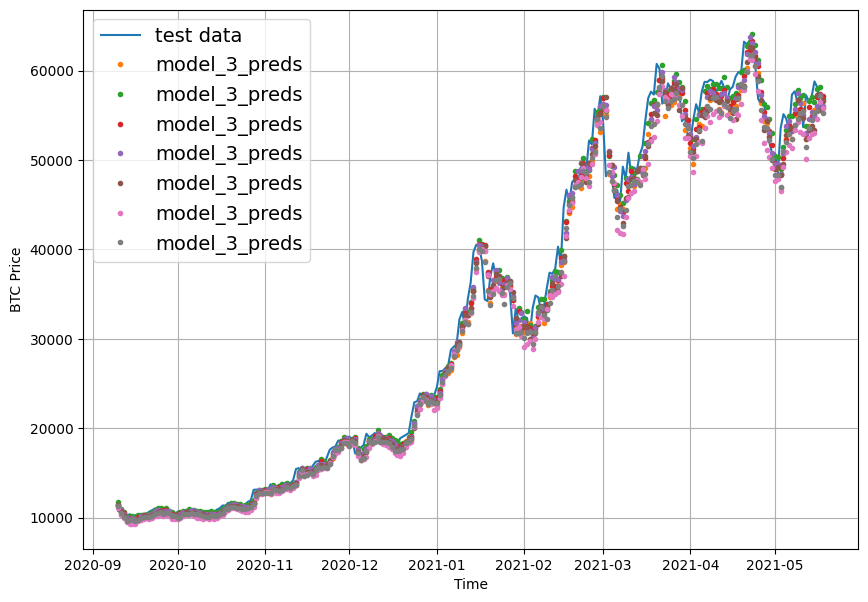

In [77]:
offset = 300
plt.figure(figsize=(10,7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values = test_labels[:,0],format="-", start=offset, label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values = model_3_preds, start=offset, label="model_3_preds")

In [78]:
model_3_preds[0]

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([9161.679 , 9312.1045, 9165.387 , 9146.365 , 9091.256 , 8994.304 ,
       9216.758 ], dtype=float32)>

In [79]:
tf.reduce_mean(model_3_preds[0])

<tf.Tensor: shape=(), dtype=float32, numpy=9155.407>

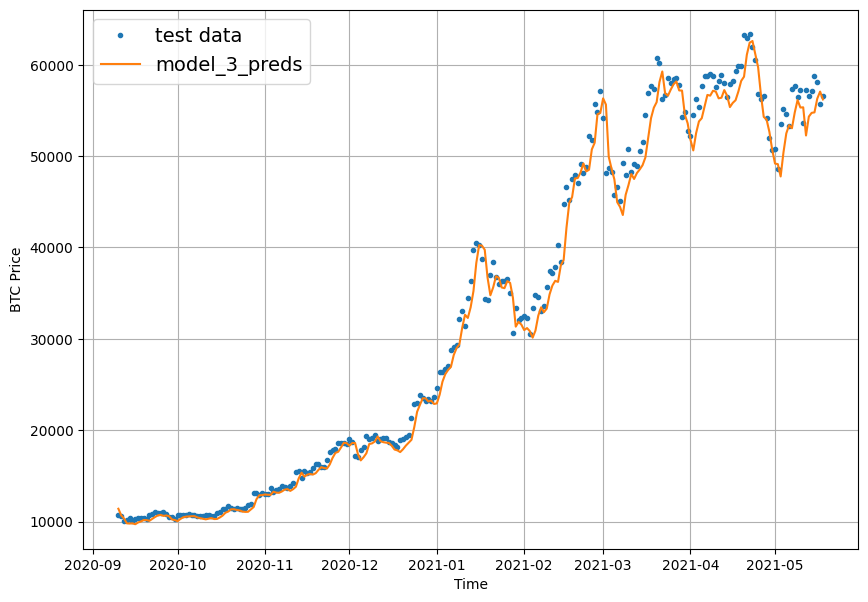

In [80]:
offset = 300
plt.figure(figsize=(10,7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values = test_labels[:,0], start=offset, label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values = tf.reduce_mean(model_3_preds, axis=1), format="-", start=offset, label="model_3_preds")

In [81]:
naive_results.values()

dict_values([567.9802, 2.516525, 0.99957, 1147547.0, 1071.2362])

## Which of our models is performing the best so far?
So we've trained a few models, now let's compare them and see how they've gone...

<Axes: >

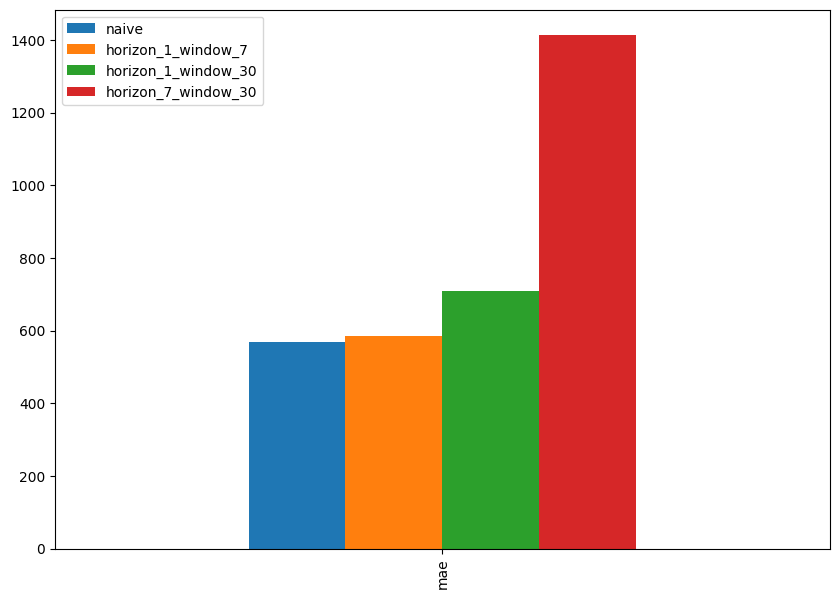

In [82]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10,7), kind="bar")

In [83]:

# import matplotlib.pyplot as plt

# plt.plot(list(naive_results.keys()), list(naive_results.values()), marker='o', label='naive_results')
# plt.plot(list(model_2_results.keys()), list(model_2_results.values()), marker='o', label='model_2_results')
# plt.plot(list(model_3_results.keys()), list(model_3_results.values()), marker='o', label='model_3_results')

# plt.legend()
# plt.show()


Note: You might be wondering, why are the naïve results so good? One of the reasons could be due the presence of autocorrelation in the data. If a time series has autocorrelation it means the value at t+1 (the next timestep) is typically close to the value at t (the current
timestep). In other words, today's value is probably pretty close to yesterday's value. Of course,
this isn't always the case but when it is, a naïve model will often get fairly good results.

**Resource:** For more on how autocorrelation influences a model's predictions, see the article[How (not) to use Machine Learning for time series forecasting: avoiding the pitfalls by Vegard Flovik.](https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424)

## Model 4 : Conv1D 


In [84]:
HORIZON = 1
WINDOW_SIZE = 7

# Make windowe data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)


# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                               labels=full_labels,
                                                                               test_split=0.2)
len(full_windows), len(full_labels), len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2780, 2780, 2224, 556, 2224, 556)

To use the Conv1D layer, we need an input shape of : `batch, timesteps, input_dim`...

However our data isn't in that shape yet

In [85]:
# Check data input shape
train_windows[0].shape

(7,)

In [86]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x 

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [87]:
expand_dims_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1)) # add an extra dimension for `input_dim` in the end of the tensor  with -1 and on position 1 with axis=1

In [88]:
# Test out our lambda layer
print(f"original shape: {x.shape}") # (WINDOW_SIZE)
print(f"expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

original shape: (7,)
expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [89]:
import tensorflow as tf

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)
input_shape = train_windows.shape[1:]

model_4 = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.Conv1D(128, kernel_size=5, strides=1, padding="causal", activation="relu"), # Add a Flatten layer to collapse the spatial dimensions
    tf.keras.layers.Dense(HORIZON) # linear activation is the same as having no activation
], name="model_4") # name our model so we can save it 

# 2. Compile the model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam()) 
# 3. Fit the model
history_model_4 = model_4.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=0,
                              batch_size=128,
                              validation_data=(test_windows,test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_4.name)]);

In [90]:
model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [91]:
model_4 = tf.keras.models.load_model("model_experiments/model_4/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 571.1932


571.1932373046875

In [92]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 571.1932


571.1932373046875

In [93]:
model_4_preds = make_preds(model_4,test_windows)
model_4_preds.shape

18/18 [==============================] - 0s 2ms/step


TensorShape([556])

In [94]:
model_4_results = evaluate_preds(tf.squeeze(test_labels), model_4_preds)
model_4_results

{'mae': 571.1933,
 'mape': 2.5608814,
 'mase': 1.0034285,
 'mse': 1180815.8,
 'rmse': 1086.6534}

<Axes: >

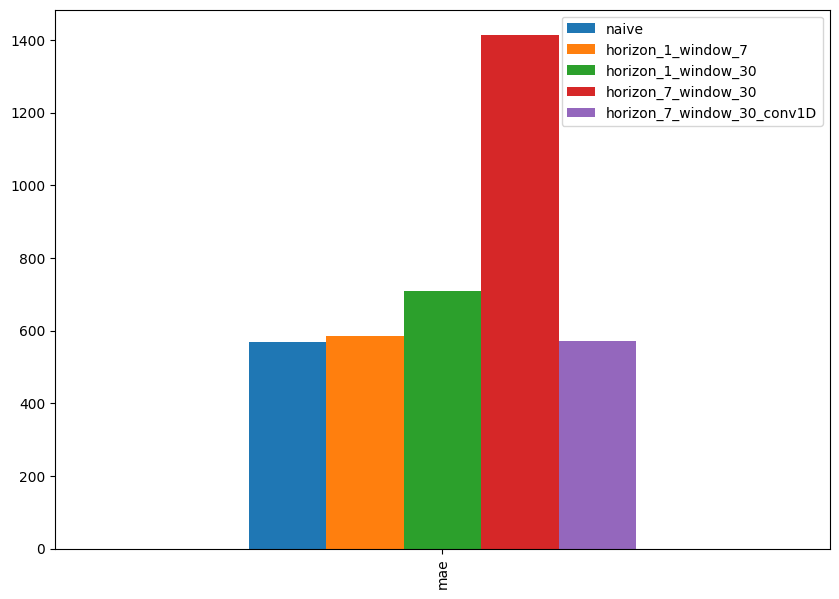

In [95]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"],
              "horizon_7_window_30_conv1D": model_4_results["mae"]}, index=["mae"]).plot(figsize=(10,7), kind="bar")

## model 4 :  Conv1D With using KERAS TUNER 

In [96]:
#!pip install keras-tuner==1.0.4

In [97]:
# # function 
# import tensorflow as tf
# from kerastuner import RandomSearch

# def build_model_4_op(hp):
#     model_4_op = tf.keras.Sequential([
#         tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
#         tf.keras.layers.Conv1D(
#             filters=hp.Int('filters', min_value=32, max_value=256, step=32),
#             kernel_size=hp.Choice('kernel_size', values=[3, 5]),
#             strides=1,
#             padding="causal",
#             activation="relu"
#         ),
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(HORIZON)
#     ], name="model_4_op")

#     model_4_op.compile(loss="mae",
#                        optimizer=tf.keras.optimizers.Adam(
#                            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
#                            ),
#                        metrics=["mae", "mse"])

#     return model_4_op

# tuner = RandomSearch(
#     build_model_4_op,
#     objective='mae',
#     max_trials=20,
#     executions_per_trial=3,
#     directory='my_dir',
#     project_name='build_model_4_op')

# tuner.search_space_summary()

In [98]:
# tuner.search(train_windows, train_labels, epochs=100, verbose=1, batch_size=128, validation_data=(test_windows, test_labels))

In [99]:
# best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
# final_model_4_op = build_model_4_op(best_hp)

In [100]:
# #input_shape = (train_windows.shape[1])
# final_model_4_op.build(train_windows.shape)
# final_model_4_op.summary()

In [101]:
# history_model_4_op = final_model_4_op.fit(train_windows,
#                                           train_labels,
#                                           epochs=100,
#                                           verbose=0,
#                                           batch_size=128,
#                                           validation_data=(test_windows, test_labels),
#                                           callbacks=[create_model_checkpoint(model_name=final_model_4_op.name)])

In [102]:
# final_model_4_op.evaluate(test_windows, test_labels)

In [103]:
# # function
# # Import pandas
# import pandas as pd

# # Obtenir les meilleurs modèles
# best_models = tuner.get_best_models(num_models=20)  # Vous pouvez modifier num_models pour récupérer le nombre de meilleurs modèles que vous souhaitez

# # Créer une liste vide pour stocker les paramètres et les scores
# hyperparameters_scores_list = []

# # Parcourir les trials et ajouter les hyperparamètres et les scores correspondants à la liste
# for trial in tuner.oracle.trials.values():
#     hyperparameters = trial.hyperparameters.values
#     val_loss_mae = trial.score
#     mae = trial.metrics.metrics["loss"].get_best_value()

#     hyperparameters_scores = {
#         'filters': hyperparameters['filters'],
#         'kernel_size': hyperparameters['kernel_size'],
#         'learning_rate': hyperparameters['learning_rate'],
#         'val_loss': val_loss_mae,
#         'mae': mae
#     }
#     hyperparameters_scores_list.append(hyperparameters_scores)

# # Convertir la liste en DataFrame pandas
# hyperparameters_scores_df = pd.DataFrame(hyperparameters_scores_list)

# # Trier le DataFrame en fonction de val_loss et sélectionner les meilleurs modèles
# hyperparameters_scores_df = hyperparameters_scores_df.sort_values(by='mae', ascending=False).head(len(best_models));

# # Réinitialiser l'index du DataFrame
# hyperparameters_scores_df.reset_index(drop=True, inplace=True);

In [104]:
# hyperparameters_scores_df

In [105]:
# model_4_op_preds = make_preds(final_model_4_op,test_windows)

In [106]:
# model_4_op_results = evaluate_preds(test_labels,model_4_op_preds)
# model_4_op_results

## Model 5 : RNN (LSTM)

In [107]:
HORIZON = 1
WINDOW_SIZE = 7

# Make windowe data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)

# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                               labels=full_labels,
                                                                               test_split=0.2)
len(full_windows), len(full_labels), len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2780, 2780, 2224, 556, 2224, 556)

In [108]:
import tensorflow as tf

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)
input_shape = train_windows.shape[1:]

model_5 = tf.keras.Sequential([
    # Vous pouvez ajuster le nombre d'unités LSTM et le retour de séquences en fonction de votre modèle.
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # add an extra dimension for `input_dim` in the end of the tensor  with -1 and on position 1 with axis=1
    # tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(128, activation="relu"),
    # tf.keras.layers.LSTM(32, activation="relu"),
    tf.keras.layers.Dense(HORIZON) # linear activation is the same as having no activation
], name="model_5_LSTM") # name our model so we can save it 

# 2. Compile the model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam()) 
# 3. Fit the model
history_model_5 = model_5.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(test_windows,test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_5.name)]);

Epoch 1/100
11/18 [=================>............] - ETA: 0s - loss: 2741.3408 

18/18 [==============================] - 4s 120ms/step - loss: 2436.6958 - val_loss: 10299.6611
Epoch 2/100
12/18 [===================>..........] - ETA: 0s - loss: 1177.5031

18/18 [==============================] - 2s 144ms/step - loss: 943.2368 - val_loss: 1141.7281
Epoch 3/100
11/18 [=================>............] - ETA: 0s - loss: 253.1778

18/18 [==============================] - 2s 106ms/step - loss: 248.3358 - val_loss: 1031.8146
Epoch 4/100
11/18 [=================>............] - ETA: 0s - loss: 208.7439

18/18 [==============================] - 2s 104ms/step - loss: 189.8342 - val_loss: 987.0438
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 178.3853 - val_loss: 1003.5928
Epoch 6/100
12/18 [===================>..........] - ETA: 0s - loss: 170.6135

18/18 [==============================] - 2s 127ms/step - loss: 173.7645 - val_loss: 966.0167
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 170.9351 - val_loss: 972.1013
Epoch 8/100
18/18 [==============================] - 0s 7ms/step - loss: 169.3442 - val_loss: 978.4374
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 167.4520 - val_loss: 967.3169
Epoch 10/100
10/18 [===============>..............] - ETA: 0s - loss: 161.5041

18/18 [==============================] - 2s 107ms/step - loss: 166.5611 - val_loss: 944.8724
Epoch 11/100
11/18 [=================>............] - ETA: 0s - loss: 172.7660

18/18 [==============================] - 2s 114ms/step - loss: 166.4047 - val_loss: 933.0206
Epoch 12/100
18/18 [==============================] - ETA: 0s - loss: 165.6391

18/18 [==============================] - 2s 138ms/step - loss: 165.6391 - val_loss: 932.5103
Epoch 13/100
11/18 [=================>............] - ETA: 0s - loss: 156.3614

18/18 [==============================] - 2s 125ms/step - loss: 163.5048 - val_loss: 924.2678
Epoch 14/100
18/18 [==============================] - 0s 8ms/step - loss: 162.1196 - val_loss: 934.0795
Epoch 15/100
11/18 [=================>............] - ETA: 0s - loss: 157.8944

18/18 [==============================] - 2s 103ms/step - loss: 161.6058 - val_loss: 922.3973
Epoch 16/100
11/18 [=================>............] - ETA: 0s - loss: 160.9672

18/18 [==============================] - 2s 103ms/step - loss: 159.9810 - val_loss: 892.9736
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 158.3092 - val_loss: 949.9897
Epoch 18/100
18/18 [==============================] - 0s 7ms/step - loss: 158.5103 - val_loss: 927.3006
Epoch 19/100
18/18 [==============================] - 0s 7ms/step - loss: 156.1277 - val_loss: 905.2780
Epoch 20/100
11/18 [=================>............] - ETA: 0s - loss: 159.8655

18/18 [==============================] - 2s 102ms/step - loss: 155.8975 - val_loss: 867.3505
Epoch 21/100
18/18 [==============================] - 0s 7ms/step - loss: 154.1140 - val_loss: 870.6364
Epoch 22/100
18/18 [==============================] - 0s 8ms/step - loss: 152.8381 - val_loss: 868.7656
Epoch 23/100
18/18 [==============================] - 0s 7ms/step - loss: 152.9283 - val_loss: 893.5807
Epoch 24/100
11/18 [=================>............] - ETA: 0s - loss: 147.3863

18/18 [==============================] - 2s 116ms/step - loss: 150.6642 - val_loss: 860.1043
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 149.8051

18/18 [==============================] - 3s 157ms/step - loss: 149.8051 - val_loss: 834.0153
Epoch 26/100
18/18 [==============================] - 0s 7ms/step - loss: 148.1711 - val_loss: 834.4788
Epoch 27/100
18/18 [==============================] - 0s 8ms/step - loss: 147.1716 - val_loss: 836.8213
Epoch 28/100
12/18 [===================>..........] - ETA: 0s - loss: 146.1957

18/18 [==============================] - 2s 103ms/step - loss: 146.1674 - val_loss: 816.3342
Epoch 29/100
18/18 [==============================] - 0s 7ms/step - loss: 145.3006 - val_loss: 825.9964
Epoch 30/100
18/18 [==============================] - 0s 7ms/step - loss: 144.3898 - val_loss: 826.2110
Epoch 31/100
12/18 [===================>..........] - ETA: 0s - loss: 144.2548

18/18 [==============================] - 2s 102ms/step - loss: 142.4343 - val_loss: 791.5873
Epoch 32/100
18/18 [==============================] - 0s 7ms/step - loss: 141.7398 - val_loss: 797.3683
Epoch 33/100
18/18 [==============================] - 0s 7ms/step - loss: 141.8856 - val_loss: 816.5865
Epoch 34/100
11/18 [=================>............] - ETA: 0s - loss: 147.8523

18/18 [==============================] - 2s 102ms/step - loss: 141.5631 - val_loss: 772.9247
Epoch 35/100
18/18 [==============================] - 0s 8ms/step - loss: 138.6180 - val_loss: 777.2314
Epoch 36/100
12/18 [===================>..........] - ETA: 0s - loss: 137.0145

18/18 [==============================] - 2s 101ms/step - loss: 139.1287 - val_loss: 769.1703
Epoch 37/100
18/18 [==============================] - 0s 7ms/step - loss: 137.1999 - val_loss: 778.2695
Epoch 38/100
12/18 [===================>..........] - ETA: 0s - loss: 139.7649

18/18 [==============================] - 3s 160ms/step - loss: 135.5581 - val_loss: 748.8343
Epoch 39/100
13/18 [====================>.........] - ETA: 0s - loss: 135.9957

18/18 [==============================] - 2s 107ms/step - loss: 135.4411 - val_loss: 745.6943
Epoch 40/100
18/18 [==============================] - 0s 7ms/step - loss: 135.9212 - val_loss: 748.2592
Epoch 41/100
12/18 [===================>..........] - ETA: 0s - loss: 136.5630

18/18 [==============================] - 2s 105ms/step - loss: 133.3045 - val_loss: 733.4156
Epoch 42/100
11/18 [=================>............] - ETA: 0s - loss: 133.2528

18/18 [==============================] - 2s 104ms/step - loss: 132.0513 - val_loss: 730.6359
Epoch 43/100
18/18 [==============================] - 0s 7ms/step - loss: 131.7247 - val_loss: 738.5305
Epoch 44/100
12/18 [===================>..........] - ETA: 0s - loss: 128.9715

18/18 [==============================] - 2s 99ms/step - loss: 129.4458 - val_loss: 719.7532
Epoch 45/100
12/18 [===================>..........] - ETA: 0s - loss: 125.2189

18/18 [==============================] - 2s 126ms/step - loss: 129.3851 - val_loss: 714.4617
Epoch 46/100
18/18 [==============================] - 0s 7ms/step - loss: 129.3975 - val_loss: 717.6426
Epoch 47/100
11/18 [=================>............] - ETA: 0s - loss: 116.8015

18/18 [==============================] - 2s 134ms/step - loss: 129.3473 - val_loss: 712.6060
Epoch 48/100
18/18 [==============================] - 0s 13ms/step - loss: 127.4889 - val_loss: 714.3976
Epoch 49/100
18/18 [==============================] - ETA: 0s - loss: 127.1737

18/18 [==============================] - 2s 108ms/step - loss: 127.1737 - val_loss: 709.7305
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 130.1110 - val_loss: 719.9988
Epoch 51/100
18/18 [==============================] - 0s 7ms/step - loss: 129.9921 - val_loss: 764.1669
Epoch 52/100
11/18 [=================>............] - ETA: 0s - loss: 139.0661

18/18 [==============================] - 2s 102ms/step - loss: 131.6829 - val_loss: 687.9050
Epoch 53/100
18/18 [==============================] - 0s 8ms/step - loss: 126.7283 - val_loss: 689.1398
Epoch 54/100
18/18 [==============================] - 0s 7ms/step - loss: 126.1947 - val_loss: 687.9907
Epoch 55/100
12/18 [===================>..........] - ETA: 0s - loss: 129.6427

18/18 [==============================] - 2s 125ms/step - loss: 123.6202 - val_loss: 676.0713
Epoch 56/100
18/18 [==============================] - 0s 7ms/step - loss: 125.8382 - val_loss: 680.6954
Epoch 57/100
18/18 [==============================] - 0s 8ms/step - loss: 125.1330 - val_loss: 677.7387
Epoch 58/100
11/18 [=================>............] - ETA: 0s - loss: 123.7306

18/18 [==============================] - 2s 104ms/step - loss: 122.0310 - val_loss: 665.0159
Epoch 59/100
12/18 [===================>..........] - ETA: 0s - loss: 117.5344

18/18 [==============================] - 2s 100ms/step - loss: 121.1983 - val_loss: 663.2057
Epoch 60/100
18/18 [==============================] - 0s 8ms/step - loss: 122.4098 - val_loss: 669.4966
Epoch 61/100
18/18 [==============================] - 0s 8ms/step - loss: 123.6662 - val_loss: 711.8303
Epoch 62/100
18/18 [==============================] - 0s 14ms/step - loss: 128.1718 - val_loss: 735.2288
Epoch 63/100
18/18 [==============================] - ETA: 0s - loss: 124.5211

18/18 [==============================] - 2s 137ms/step - loss: 124.5211 - val_loss: 661.3270
Epoch 64/100
11/18 [=================>............] - ETA: 0s - loss: 125.0121

18/18 [==============================] - 2s 102ms/step - loss: 119.8988 - val_loss: 654.4646
Epoch 65/100
12/18 [===================>..........] - ETA: 0s - loss: 120.4632

18/18 [==============================] - 3s 154ms/step - loss: 119.5788 - val_loss: 646.8475
Epoch 66/100
18/18 [==============================] - 0s 7ms/step - loss: 119.1905 - val_loss: 673.5015
Epoch 67/100
12/18 [===================>..........] - ETA: 0s - loss: 115.9102

18/18 [==============================] - 2s 99ms/step - loss: 119.2351 - val_loss: 642.1541
Epoch 68/100
12/18 [===================>..........] - ETA: 0s - loss: 117.6225

18/18 [==============================] - 2s 104ms/step - loss: 118.7088 - val_loss: 641.2856
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 121.5524 - val_loss: 641.8895
Epoch 70/100
11/18 [=================>............] - ETA: 0s - loss: 116.3074

18/18 [==============================] - 2s 113ms/step - loss: 118.1925 - val_loss: 636.0145
Epoch 71/100
18/18 [==============================] - 0s 13ms/step - loss: 118.9861 - val_loss: 662.1577
Epoch 72/100
18/18 [==============================] - 0s 12ms/step - loss: 121.9147 - val_loss: 651.3831
Epoch 73/100
13/18 [====================>.........] - ETA: 0s - loss: 120.0535

18/18 [==============================] - 3s 153ms/step - loss: 119.5121 - val_loss: 630.5443
Epoch 74/100
18/18 [==============================] - 0s 7ms/step - loss: 117.5335 - val_loss: 642.1320
Epoch 75/100
18/18 [==============================] - 0s 7ms/step - loss: 117.9908 - val_loss: 635.6016
Epoch 76/100
18/18 [==============================] - 0s 7ms/step - loss: 116.7758 - val_loss: 632.8015
Epoch 77/100
18/18 [==============================] - 0s 8ms/step - loss: 118.8199 - val_loss: 680.3945
Epoch 78/100
12/18 [===================>..........] - ETA: 0s - loss: 118.9545

18/18 [==============================] - 2s 103ms/step - loss: 121.2617 - val_loss: 622.3727
Epoch 79/100
10/18 [===============>..............] - ETA: 0s - loss: 113.7214

18/18 [==============================] - 2s 108ms/step - loss: 115.7009 - val_loss: 620.4692
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 116.1461 - val_loss: 638.1569
Epoch 81/100
18/18 [==============================] - 0s 7ms/step - loss: 115.6073 - val_loss: 641.5999
Epoch 82/100
18/18 [==============================] - 0s 7ms/step - loss: 117.9180 - val_loss: 621.8279
Epoch 83/100
18/18 [==============================] - 0s 8ms/step - loss: 115.2693 - val_loss: 662.5227
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 116.9871 - val_loss: 621.3153
Epoch 85/100
18/18 [==============================] - 0s 8ms/step - loss: 115.5821 - val_loss: 643.8943
Epoch 86/100
11/18 [=================>............] - ETA: 0s - loss: 111.2137

18/18 [==============================] - 2s 102ms/step - loss: 117.0419 - val_loss: 615.8555
Epoch 87/100
11/18 [=================>............] - ETA: 0s - loss: 119.6797

18/18 [==============================] - 2s 104ms/step - loss: 114.9123 - val_loss: 613.0197
Epoch 88/100
18/18 [==============================] - 0s 8ms/step - loss: 115.8127 - val_loss: 635.3489
Epoch 89/100
18/18 [==============================] - 0s 14ms/step - loss: 114.1683 - val_loss: 652.2548
Epoch 90/100
18/18 [==============================] - 0s 13ms/step - loss: 119.5686 - val_loss: 635.6202
Epoch 91/100
18/18 [==============================] - 0s 12ms/step - loss: 115.9260 - val_loss: 649.8973
Epoch 92/100
14/18 [======================>.......] - ETA: 0s - loss: 115.7049

18/18 [==============================] - 3s 159ms/step - loss: 114.4404 - val_loss: 607.1630
Epoch 93/100
18/18 [==============================] - 0s 7ms/step - loss: 114.2319 - val_loss: 618.5035
Epoch 94/100
11/18 [=================>............] - ETA: 0s - loss: 111.1556

18/18 [==============================] - 2s 103ms/step - loss: 113.5395 - val_loss: 606.3448
Epoch 95/100
11/18 [=================>............] - ETA: 0s - loss: 109.2587

18/18 [==============================] - 2s 101ms/step - loss: 113.2133 - val_loss: 604.6370
Epoch 96/100
18/18 [==============================] - 0s 8ms/step - loss: 114.2690 - val_loss: 619.5621
Epoch 97/100
18/18 [==============================] - 0s 7ms/step - loss: 116.4625 - val_loss: 653.1241
Epoch 98/100
11/18 [=================>............] - ETA: 0s - loss: 116.3197

18/18 [==============================] - 2s 101ms/step - loss: 114.9793 - val_loss: 600.2180
Epoch 99/100
18/18 [==============================] - 0s 8ms/step - loss: 112.2892 - val_loss: 600.8914
Epoch 100/100
11/18 [=================>............] - ETA: 0s - loss: 121.1774

18/18 [==============================] - 2s 102ms/step - loss: 113.6267 - val_loss: 598.1963


In [109]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 598.1963


598.1962890625

In [110]:
# Make prediction our LSTM model
model_5_preds = make_preds(model_5, test_windows)

18/18 [==============================] - 0s 2ms/step


In [111]:
model_5_results = evaluate_preds(test_labels, model_5_preds)

<Axes: >

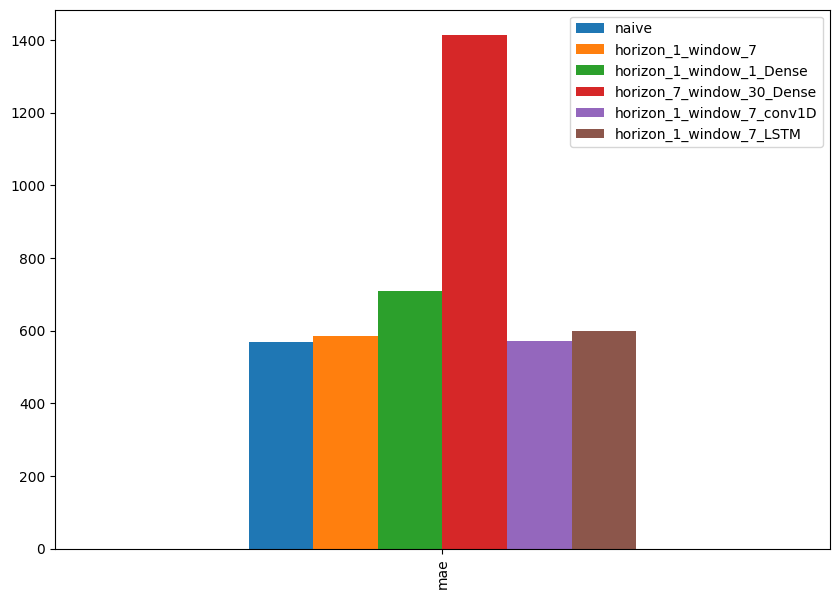

In [112]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_1_Dense": model_2_results["mae"],
              "horizon_7_window_30_Dense": model_3_results["mae"],
              "horizon_1_window_7_conv1D": model_4_results["mae"],
              "horizon_1_window_7_LSTM":model_5_results["mae"]}, index=["mae"]).plot(figsize=(10,7), kind="bar")

**Note:** Because neural networks are such powerful algorithms, they can be used for almost any problem, however, that doesn't mean they'll achieve performant or usable results. You're probably starting to clue into this now.

## Model 5 : RNN (LSTM)  with using KERAS TUNER

In [113]:
# import tensorflow as tf
# from kerastuner import RandomSearch

# # Set random seed for as reproducible results as possible
# tf.random.set_seed(42)
# input_shape = train_windows.shape[1:]
# # Define the model building function
# def build_model(hp):
#     model = tf.keras.Sequential([
#         tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=input_shape),
#         tf.keras.layers.LSTM(hp.Int('units_1', min_value=64, max_value=256, step=32), return_sequences=True),
#         tf.keras.layers.LSTM(hp.Int('units_2', min_value=64, max_value=256, step=32)),
#         tf.keras.layers.Dense(hp.Int('units_3', min_value=16, max_value=128, step=16), activation="relu"),
#         tf.keras.layers.Dense(HORIZON)
#     ])

#     model.compile(loss="mae",
#                   optimizer=tf.keras.optimizers.Adam(
#                       hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
#                   ))
#     return model

# # Configure the tuner
# tuner = RandomSearch(
#     build_model,
#     objective='val_loss',
#     max_trials=30,
#     executions_per_trial=1,
#     directory='my_dir',
#     project_name='model_5_LSTM'
# )


In [114]:
# # Search for the best hyperparameters
# tuner.search(train_windows, train_labels,
#              epochs=100,
#              verbose=1,
#              batch_size=128,
#              validation_data=(test_windows, test_labels),
#              callbacks=[create_model_checkpoint(model_name='model_5_LSTM')])

In [115]:

# # Get the best hyperparameters
# best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# # Build the best model
# best_model = build_model(best_hp)

# # Fit the best model
# history_best_model = best_model.fit(train_windows,
#                                     train_labels,
#                                     epochs=100,
#                                     verbose=1,
#                                     batch_size=128,
#                                     validation_data=(test_windows, test_labels),
#                                     callbacks=[create_model_checkpoint(model_name='best_model')])

## Make a multivariate time series time series dataset

Before we add a feature to our time series, what is a feature we can use?

One feature we could add is whether or not Daniel Bourke tweeted o that day...

* day 1 - 0
* day 2 - 1
* day 3 - 0

what's a better feature to use?

How about the bitcoin halving events ?
https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

on rajoute les date d'evenement qui ont influencé le cours et les meme date a venir pour que notre model les prenent en compte

In [153]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [117]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset (our data it starts from 01 October 2013)
black_reward_2 = 25 # 8 november 2012
black_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Black reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [118]:
black_reward_2, block_reward_2_datetime

(25, numpy.datetime64('2012-11-28'))

In [119]:
# Create date ranges of where specific block_reward values should be

In [120]:
# Add in block_reward values as a feature to our dataframe

In [151]:
# # Créer un dictionnaire contenant les dates et les récompenses de chaque événement de halving
# halving_events = {
#     pd.Timestamp("2012-11-28"): 25,
#     pd.Timestamp("2016-07-09"): 12.5,
#     pd.Timestamp("2020-05-18"): 6.25
# }

# # Itérer sur le dictionnaire et ajouter chaque valeur au DataFrame
# for date, reward in halving_events.items():
#     bitcoin_prices.loc[date, 'block_reward'] = reward
# # Remplacer les valeurs manquantes par 'None' dans la colonne 'block_reward'
# bitcoin_prices['block_reward'].fillna('None', inplace=True)

In [152]:
bitcoin_prices["block_reward"].dropna()

Date
2013-10-01    None
2013-10-02    None
2013-10-03    None
2013-10-04    None
2013-10-05    None
              ... 
2021-05-15    None
2021-05-16    None
2021-05-17    None
2021-05-18    None
2012-11-28      25
Name: block_reward, Length: 2788, dtype: object